<a href="https://colab.research.google.com/github/lasyaEd/dsba6122-summer2024/blob/main/notebooks/Milestone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction and Project Outline:

*  *Objective and Dataset*: Analyze movie reviews using Natural Language Processing (NLP) techniques. Webscrapped movie reviews (using Selenium) of a movie name "kalki 2898 AD" from IMDB and saved it in an excel file.
*  *Describe the specific problem you aim to solve or the question you intend to answer*: Analyze sentiment, themes, and key topics within movie reviews to understand audience perception and reception of the movie/How do viewers perceive and discuss the chosen movie in online reviews? What are the dominant sentiments and topics?
*  *Business Context*: This analysis can provide valuable insights to movie studios, distributors, and marketers.
  * Potential Impact:
      * Audience Understanding: Understand how the movie is resonating with viewers and adjust marketing strategies accordingly.
      * Feedback Loop: Use insights to improve future productions, adjust promotional campaigns, or address specific audience concerns.
      * Competitive Edge: Gain competitive intelligence by comparing audience reactions with those of similar movies.
      * Revenue Optimization: Optimize release strategies, target demographics more effectively, and potentially increase box office or streaming revenue.




##Literature Review:

*  Find at least two online resources such as blog posts or tutorials that provide a code-implemented project related to your topic.
  1.  **Analytics Vidhya Article: Complete Guide to Analyzing Movie Reviews using NLP:** https://www.analyticsvidhya.com/blog/2022/09/complete-guide-to-analyzing-movie-reviews-using-nlp/

      Key Points:

    *  Introduces various NLP techniques for analyzing movie reviews, including
     sentiment analysis, topic modeling, and aspect-based sentiment analysis.
    *  Discusses preprocessing steps such as tokenization, stop word removal, and
     stemming/lemmatization.

    Relevance to Your Work:

    *  Provides foundational understanding of NLP techniques specifically
     tailored for movie review analysis.
    *  Guides on preprocessing steps essential for cleaning and preparing textual
     data from IMDb or similar datasets.

  2.   **Khulood Nasher's Medium Article: Text Classification on Movie Reviews:** https://khuloodnasher.medium.com/text-classification-on-movie-reviews-5150e3f7b2de

      Key Points:

      * Focuses on text classification using a dataset of movie reviews uploaded from Standford University.
      * Details steps for tokenization and vectorization using TF-IDF.
      * Uses RandomForestClassifier to fit and train data.
      * Emphasizes the importance of model evaluation and comparison to identify the performace of the model.

      Relevance to Your Work:

      * Offers practical guidance on preprocessing steps such as handling missing values, and data splitting crucial for handling movie review datasets.
      * Provides a comparative analysis using a Tfidf Vectorizer and a Random Forest classifier, achieving an accuracy of 88.6%. The author suggests potential improvements with different algorithms and further text processing.
      * Highlights considerations for model evaluation, aiding in the selection of appropriate evaluation metrics and techniques.


In [ ]:
import pandas as pd
df = pd.read_excel('output.xlsx')
df.head()

Review_Date          Author  Rating  \
0  27 June 2024         PavanKV       9   
1  27 June 2024  adipawar-98409       8   
2  27 June 2024      maheshgade       8   
3  27 June 2024    mandar-09779       9   
4  27 June 2024   PANDIAN120621       8   

                                        Review_Title  \
0   Majestic at scale, grandeur in VFX, and great...   
1         Good attempt, story and is engaging, but\n   
2   A visual treat with a strong story & characte...   
3                                    Kalki 2898 AD\n   
4             The World is onto selfish side...!!!\n   

                                              Review  \
0  Majestic at scale, grandeur in VFX, and great ...   
1  I didnt go in with big hopes, but i was expect...   
2  A unique genre, a well written story (script) ...   
3  Let me share a review of the movie "Kalki 2898...   
4  When we watch Hollywood movies we think Can't ...   

                       Review_Url  
0  /review/rw9884577/?ref_=tt_urv  
1  /review/rw9884577/?ref_=tt_urv  
2  /review/rw9884577/?ref_=tt_urv  
3  /review/rw9884577/?ref_=tt_urv  
4  /review/rw9884577/?ref_=tt_urv

## Data Preparation:

Understanding the columns of the movie reviews file:

Review_Date: The date the review was written
Author: The name of the reviewer
Rating: The rating given by the author (scale of 1 to 10)
Review_Title: The summary given by the reviewer
Review: The entire opinion of the reviewer about the title
Review_Url: The URL of the review.

**Applied the below string cleaning steps.**

  * Removed non-alphanumerics
  * Removed URLs
  * Removed line breaks
  * Replaced more than one whitespace with a single space





In [ ]:
import re

def clean_text(a):
    # Remove non-alphanumerics
    a = re.sub('[^A-Za-z0-9]+', ' ', a)
    # Remove URLs
    a = re.sub(r'http\S+|www\S+|https\S+', '', a, flags=re.MULTILINE)
    # Remove line breaks
    a = re.sub(r'\n', ' ', a)
    # Replace more than one whitespace with a single space
    a = re.sub(' +', ' ', a)

    return a.strip()


In [ ]:
# Apply clean_text function to the Review column
df['cleaned_review'] = df['Review'].apply(clean_text)

# Print the result
print(df[['Review', 'cleaned_review']])

                                                Review  \
0    Majestic at scale, grandeur in VFX, and great ...   
1    I didnt go in with big hopes, but i was expect...   
2    A unique genre, a well written story (script) ...   
3    Let me share a review of the movie "Kalki 2898...   
4    When we watch Hollywood movies we think Can't ...   
..                                                 ...   
446  Same slow motion as every movie of prabhas whi...   
447  My first thought after watching this movie was...   
448  India's biggest sci-fi movie with stunning vis...   
449  I don't understand the obsession with hero ent...   
450  "Kalki 2898 AD" attempts to blend the epic nar...   

                                        cleaned_review  
0    Majestic at scale grandeur in VFX and great bl...  
1    I didnt go in with big hopes but i was expecti...  
2    A unique genre a well written story script str...  
3    Let me share a review of the movie Kalki 2898 ...  
4    When we watch

#### Feature Engineering:
**Create Review_Date_Cleaned Column**:
Converting Review_Date column to pandas datetime format, this will be useful for EDA.

In [ ]:
df['Review_Date_Cleaned'] = pd.to_datetime(df['Review_Date']).dt.date
df.head()

Review_Date          Author  Rating  \
0  27 June 2024         PavanKV       9   
1  27 June 2024  adipawar-98409       8   
2  27 June 2024      maheshgade       8   
3  27 June 2024    mandar-09779       9   
4  27 June 2024   PANDIAN120621       8   

                                        Review_Title  \
0   Majestic at scale, grandeur in VFX, and great...   
1         Good attempt, story and is engaging, but\n   
2   A visual treat with a strong story & characte...   
3                                    Kalki 2898 AD\n   
4             The World is onto selfish side...!!!\n   

                                              Review  \
0  Majestic at scale, grandeur in VFX, and great ...   
1  I didnt go in with big hopes, but i was expect...   
2  A unique genre, a well written story (script) ...   
3  Let me share a review of the movie "Kalki 2898...   
4  When we watch Hollywood movies we think Can't ...   

                       Review_Url  \
0  /review/rw9884577/?ref_=tt_urv   
1  /review/rw9884577/?ref_=tt_urv   
2  /review/rw9884577/?ref_=tt_urv   
3  /review/rw9884577/?ref_=tt_urv   
4  /review/rw9884577/?ref_=tt_urv   

                                      cleaned_review Review_Date_Cleaned  
0  Majestic at scale grandeur in VFX and great bl...          2024-06-27  
1  I didnt go in with big hopes but i was expecti...          2024-06-27  
2  A unique genre a well written story script str...          2024-06-27  
3  Let me share a review of the movie Kalki 2898 ...          2024-06-27  
4  When we watch Hollywood movies we think Can t ...          2024-06-27

**Create review_lemmas column**: This will be useful during EDA/creating wordclouds.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
def lemmatize_text(text):
    lemmatizer = nltk.WordNetLemmatizer()
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    stop_words = set(stopwords.words('english'))
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text.lower()) if w not in stop_words]

df['review_lemmas'] = df['cleaned_review'].apply(lambda x: lemmatize_text(x))
print(df[['Review', 'cleaned_review', 'review_lemmas']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                Review  \
0    Majestic at scale, grandeur in VFX, and great ...   
1    I didnt go in with big hopes, but i was expect...   
2    A unique genre, a well written story (script) ...   
3    Let me share a review of the movie "Kalki 2898...   
4    When we watch Hollywood movies we think Can't ...   
..                                                 ...   
446  Same slow motion as every movie of prabhas whi...   
447  My first thought after watching this movie was...   
448  India's biggest sci-fi movie with stunning vis...   
449  I don't understand the obsession with hero ent...   
450  "Kalki 2898 AD" attempts to blend the epic nar...   

                                        cleaned_review  \
0    Majestic at scale grandeur in VFX and great bl...   
1    I didnt go in with big hopes but i was expecti...   
2    A unique genre a well written story script str...   
3    Let me share a review of the movie Kalki 2898 ...   
4    When we 

**Create Review_Words Column**: This column tells us how mnay words each review contains. Useful to figure out how many people write more than a word.

In [ ]:
df['review_words'] = df['Review'].str.split().str.len()
print(df[['Review', 'review_words']])


                                                Review  review_words
0    Majestic at scale, grandeur in VFX, and great ...            32
1    I didnt go in with big hopes, but i was expect...            18
2    A unique genre, a well written story (script) ...            31
3    Let me share a review of the movie "Kalki 2898...            42
4    When we watch Hollywood movies we think Can't ...            88
..                                                 ...           ...
446  Same slow motion as every movie of prabhas whi...            59
447  My first thought after watching this movie was...           109
448  India's biggest sci-fi movie with stunning vis...            67
449  I don't understand the obsession with hero ent...           120
450  "Kalki 2898 AD" attempts to blend the epic nar...            49

[451 rows x 2 columns]


## Methodology:

### An overview of the techniques and tools used for the initial movie review text processing and analysis:

**Data Cleaning and Preprocessing:**

  * Tokenization: Breaking down text into individual tokens (words).
  * Lowercasing: Converting all text to lowercase for consistency.
  * Stopwords Removal: Filtering out common words (e.g., "the", "is") that do not contribute much to the analysis using NLTK.
  * Lemmatization: Reducing words to their base or root form (e.g., "running" to "run") using NLTK's WordNetLemmatizer.

**Data Visualization:**

  * Matplotlib: Used for creating various plots and visualizations, including bar plots and WordClouds.

**Text Representation:**

  * CountVectorizer: Part of scikit-learn, used to convert text data into a matrix of token counts, which is crucial for further analysis such as identifying frequent bigrams.

**Exploratory Data Analysis (EDA):**

  * Top Words Analysis: Utilized CountVectorizer to extract and analyze the most frequent words, bigrams and trigrams from movie reviews.
  * Review Trends by Day of the Week: Analyzed and visualized trends in review posting based on the day of the week.

**Statistical Analysis:**

  * Mean, Median, and Skewness: Used to understand the central tendency and distribution of numerical ratings.

**Text Visualization:**

  * WordCloud: Generated visual representations of the most frequent words (excluding common and uninformative words like "movie" and "film") in reviews for each rating category.

**Tools:**

  * Python: Primary programming language used for data processing, analysis, and visualization.
  * Pandas: Essential for data manipulation and analysis, including handling DataFrame operations.
  * NLTK (Natural Language Toolkit): Used for advanced text processing tasks such as stopwords removal and lemmatization.
  * WordNet: Part of NLTK, used for lemmatization.
  * Matplotlib: Core library for creating static, animated, and interactive visualizations in Python.
  * WordCloud: Library for creating word clouds in Python.

These techniques and tools collectively enable thorough exploration and analysis of movie review text data, facilitating insights into trends, sentiment, and key topics discussed in the reviews.

I WOULD ALSO LIKE TO USE Tf-Idf and RandomForestClassifier.

## Preliminary Analysis:

###EDA: Rating

In [ ]:
# Group by Rating and count the number of occurrences of each rating
rating_counts = df['Rating'].value_counts().sort_index()

print(rating_counts)
print(f"Movies that do not have a rating: {df['Rating'].isnull().sum()}")

print(df['Rating'].agg(['mean','median','count']).round(2))



Rating
1      46
2      22
3       9
4      12
5      16
6      28
7      39
8      38
9      49
10    192
Name: count, dtype: int64
Movies that do not have a rating: 0
mean        7.43
median      9.00
count     451.00
Name: Rating, dtype: float64


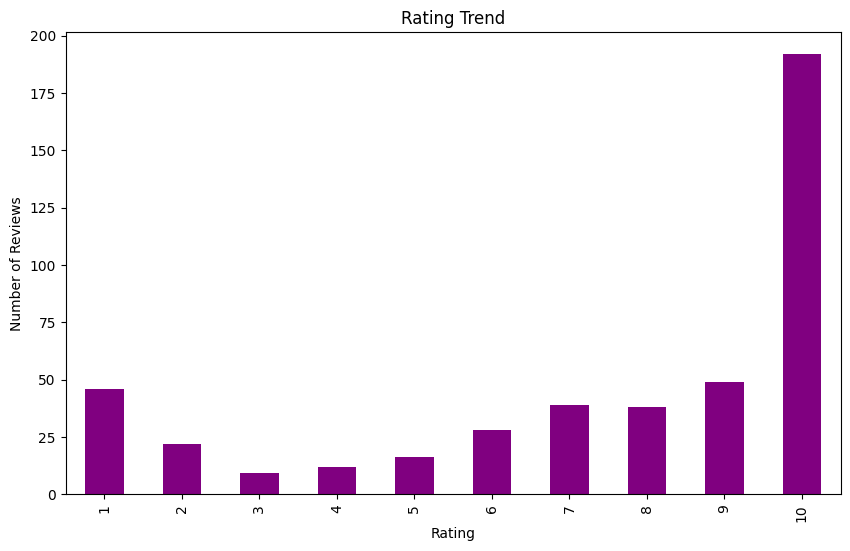

In [ ]:
import matplotlib.pyplot as plt
# Create the bar graph
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='purple')

# Add titles and labels
plt.title('Rating Trend')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Display the bar graph
plt.show()


Insights:

* All the reviews have a rating.
* The reviews’ mean rating is 7.4, and the median is 9. Data is skewed to the left
* a lot of reviews have a rating of 10.
* A higher review count is observed when rating>8.


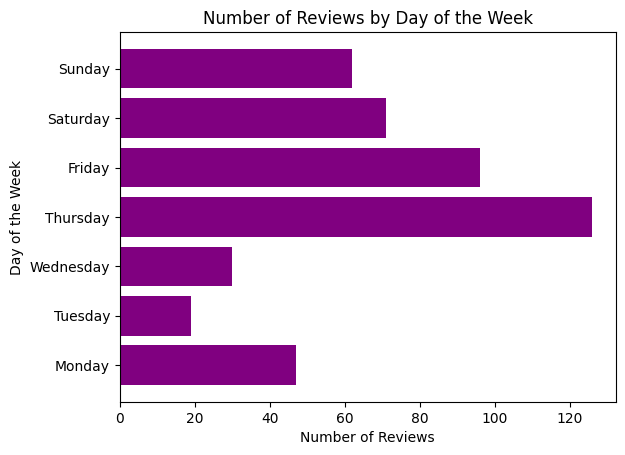

In [ ]:
# Convert 'Review_Date' to datetime and extract the day name and day of the week number
df['Review_Day'] = pd.to_datetime(df['Review_Date']).dt.day_name()
df['Review_Day_no'] = pd.to_datetime(df['Review_Date']).dt.dayofweek

# Group by 'Review_Day_no' and 'Review_Day' to count the number of reviews for each day
review_counts = df.groupby(['Review_Day_no', 'Review_Day']).Review.count().reset_index()

# Sort by 'Review_Day_no' to ensure the days are in the correct order
review_counts = review_counts.sort_values(by='Review_Day_no')

# Plot a horizontal bar graph
plt.barh(review_counts['Review_Day'], review_counts['Review'], color="purple")

# Set labels and title for the plot
plt.xlabel('Number of Reviews')
plt.ylabel('Day of the Week')
plt.title('Number of Reviews by Day of the Week')

# Show the plot
plt.show()


Insights:

* We can see that Thursday is when most of the reviews are posted.
* On a similar note, Tuesday is when the review count is minimal.
* I was expecting to observe an increase in trend the review count across the week but to my surprise, the review count is highest on thursday and lowest on Tuesday. The review count is still high on the weekend compared to the weekdays but why is it highest on Thursday?

I wanted to look at how many reviews contain a single word. I printed all of them out. At first i thought the reviews were incomplete because of an error in my code but when i looked at the data file, I found that there are incomplete reviews/reviews with one word like ".....Positives...." and "**Review:**" etc.

In [ ]:
one_word_reviews = df[df['review_words']==1]
# Print the shape of the filtered DataFrame
print(one_word_reviews.shape)
print(one_word_reviews.Review)

(3, 12)
101           Wow!
144    **Review:**
257     Positives:
Name: Review, dtype: object


#### Looking at the top words mentioned in the reviews

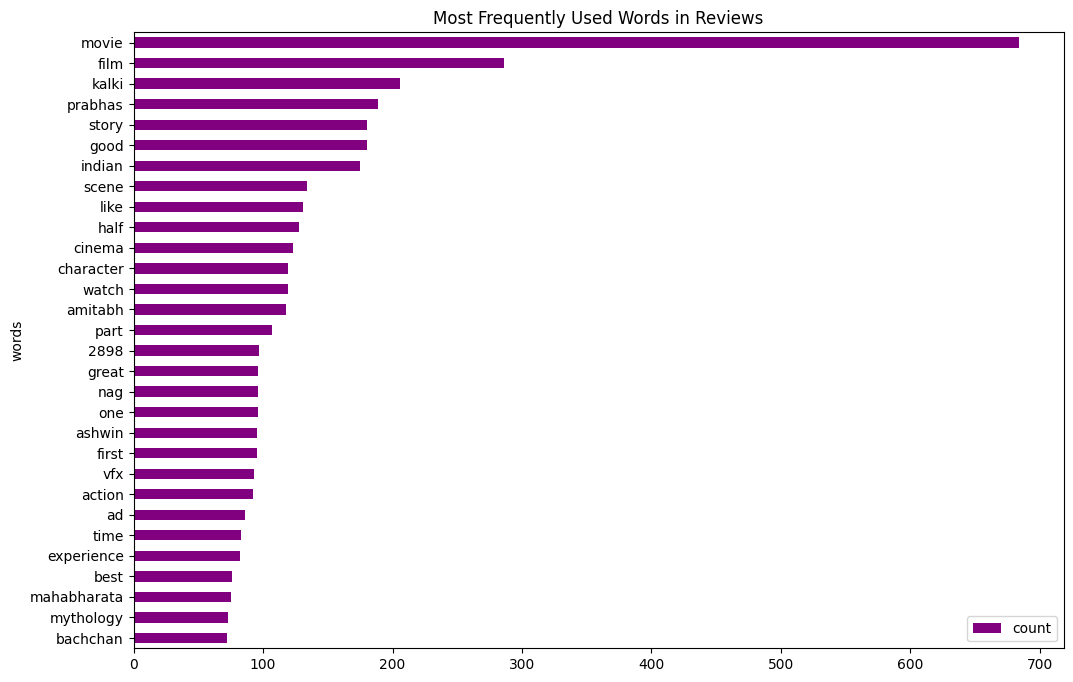

In [ ]:
# Get lemmatized tokens from the dataframe
lemmatized_tokens = list(df['review_lemmas'])

# Import necessary libraries and set up for plotting
import matplotlib.pyplot as plt
import itertools
import collections

# Flatten the list of lists into a single list of tokens
token_list = list(itertools.chain(*lemmatized_tokens))

# Count the occurrences of each token
counts_no = collections.Counter(token_list)

# Create a DataFrame with the most common 30 words
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count'])

# Plot the top words in a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently Used Words in Reviews")
plt.show()


Excluding all tokens which are obviously going to be present in the review and are not going to add any value to the analysis. I think doing this is essential for extracting meaningful insights.

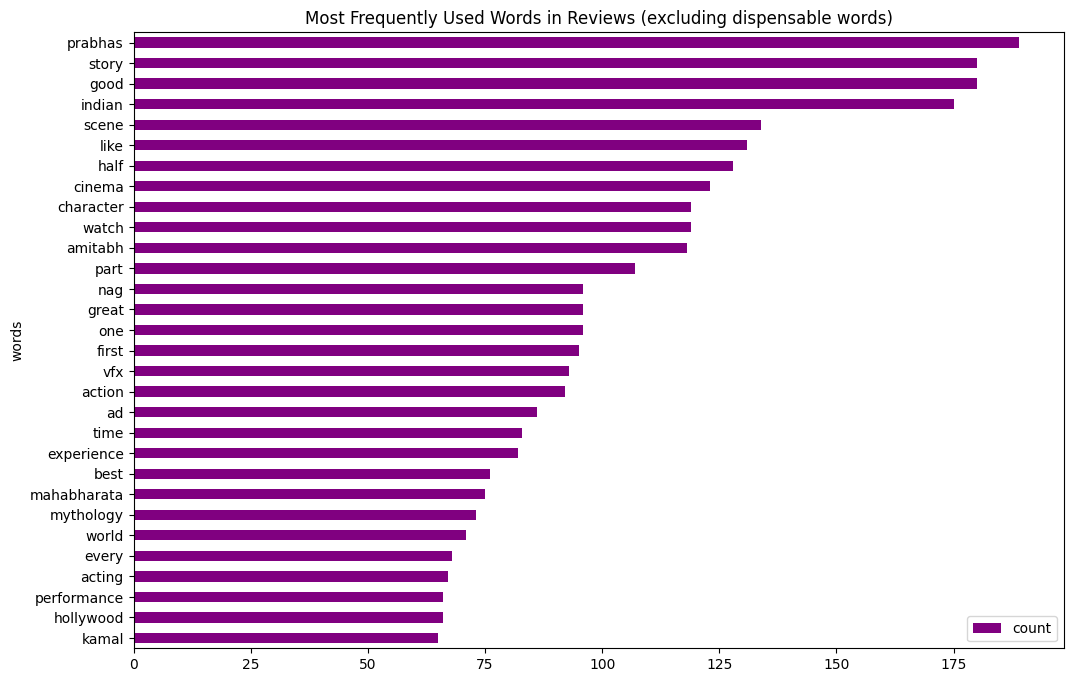

In [ ]:
# Get lemmatized tokens from the dataframe
lemmatized_tokens = list(df['review_lemmas'])

# Flatten the list of lists into a single list of tokens
token_list = list(itertools.chain(*lemmatized_tokens))

# Count the occurrences of each token
counts_no = collections.Counter(token_list)

# Remove obvious words from the counts
for word in ['movie', 'film', '2898', 'kalki', 'ashwin', 'bachchan']:
    counts_no.pop(word, None)

# Create a DataFrame with the most common 30 words
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count'])

# Plot the top words in a horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently Used Words in Reviews (excluding dispensable words)")
plt.show()


Insights: By just looking at the above graph we can say that people are talking about the actors (prabhas, amitabh and kamal) and their performances along with the story, its scenes and characters. We can assume that the movie is about indian mythology, there are vfx involved - could be good or bad.

#### EDA: Looking at the top bi-grams mentioned in the reviews

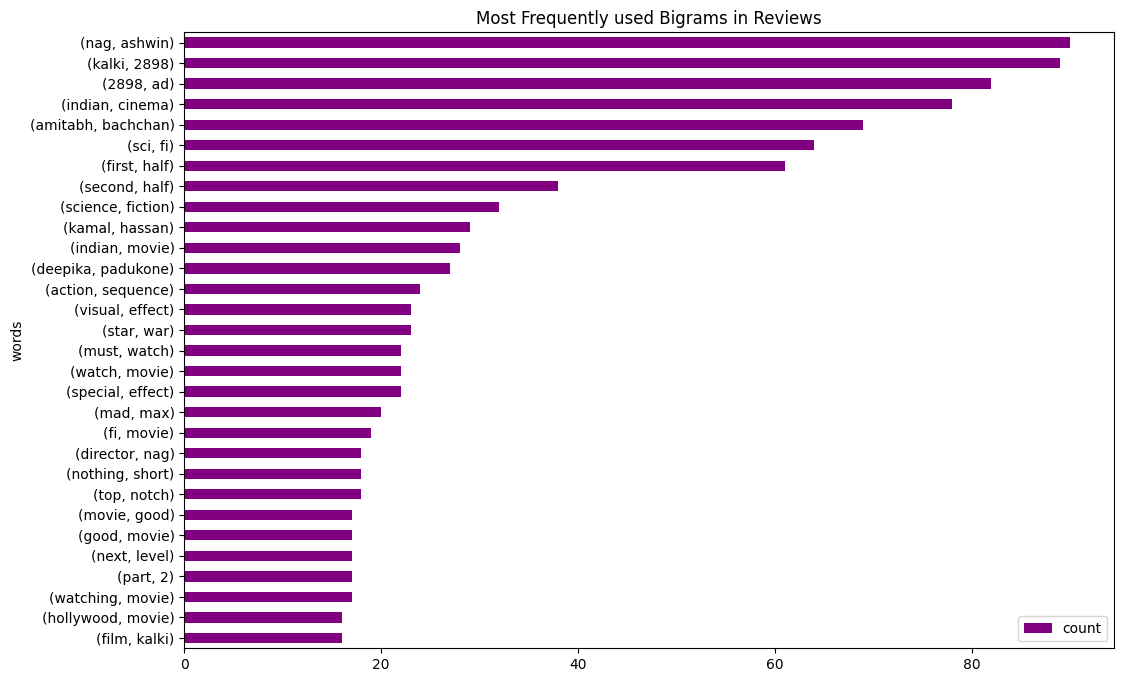

In [ ]:
import nltk
from nltk.util import ngrams
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently used Bigrams in Reviews")
plt.show()

Because of the bigrams like star wars, mad max, hollywood movie, I can assume that the production value of the movie to be high, may be even replicating the hollywood movies mentioned.

#### EDA: Looking at the top tri-grams mentioned in the reviews


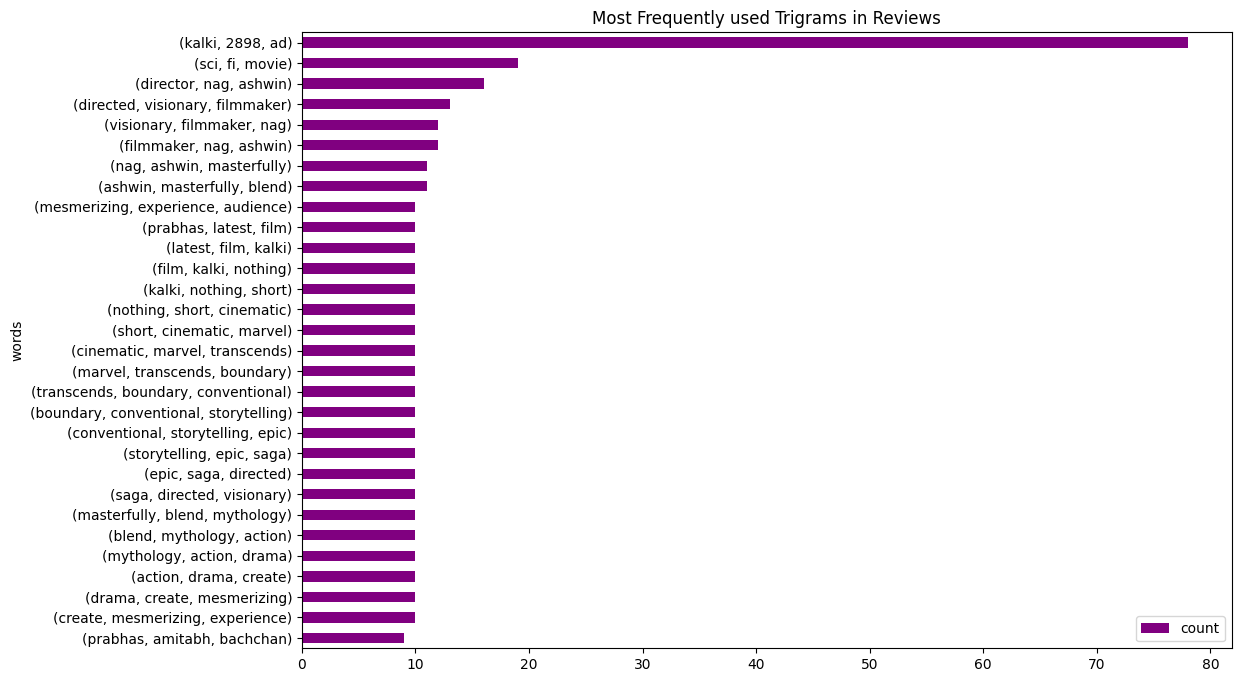

In [ ]:
counts_no = collections.Counter(ngrams(token_list, 3))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(12, 8))
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Most Frequently used Trigrams in Reviews")
plt.show()

The Trigram graph tells us that 'nag ashwin' is the director of the movie and most of the reviews talk about him and because his name is paired with words like 'masterfully' and 'visionary' we can assume that he did a good job. This trigram graph tells us about the genre of the movie, about its 'conventional storytelling' and the 'mesmerizing experience' with which people were left with.

###WORDCLOUDS

I thought this was an interesting way to look at the main topics of different ratings.

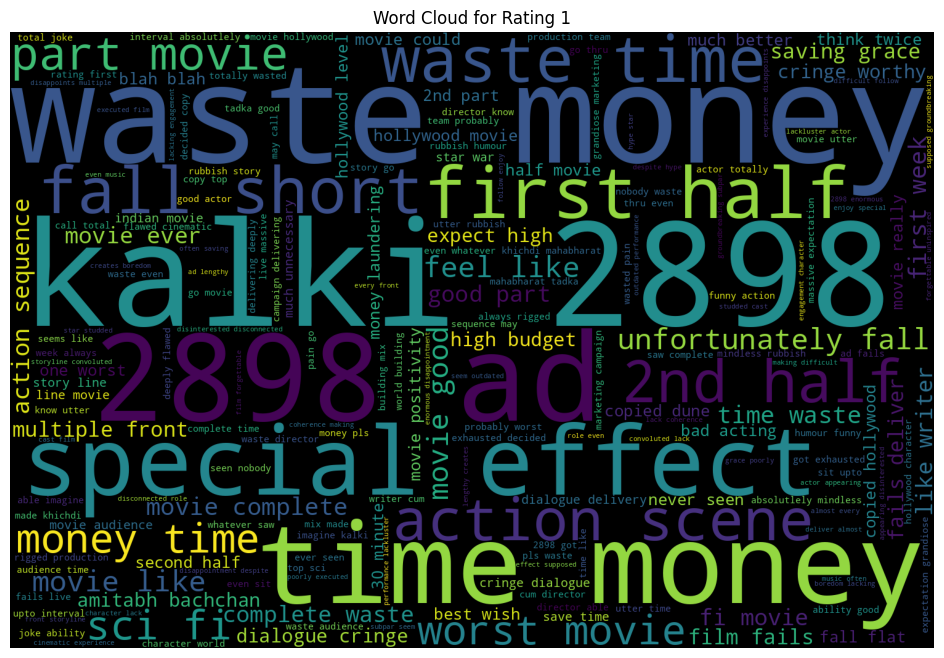

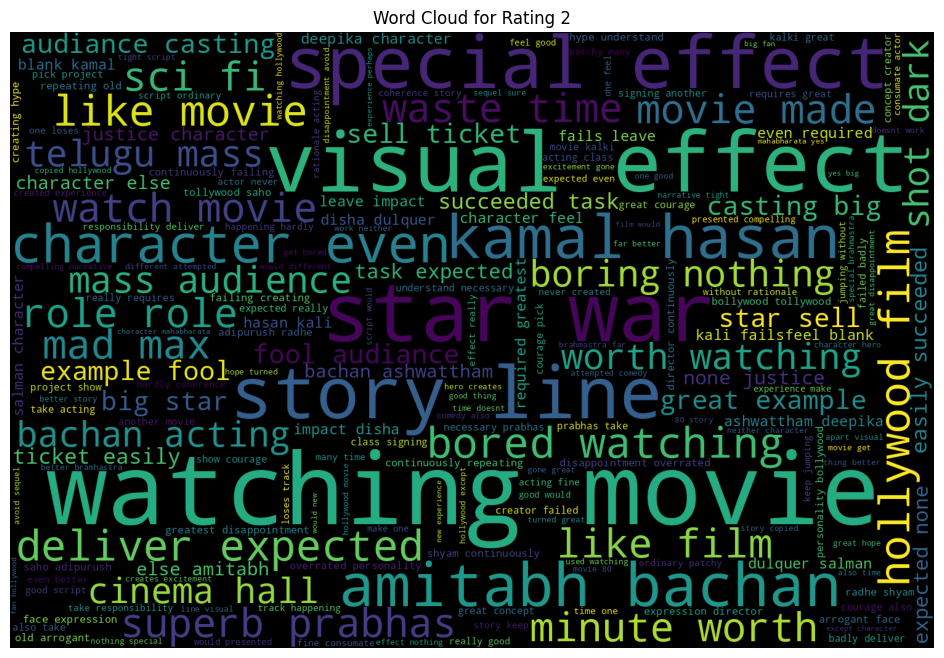

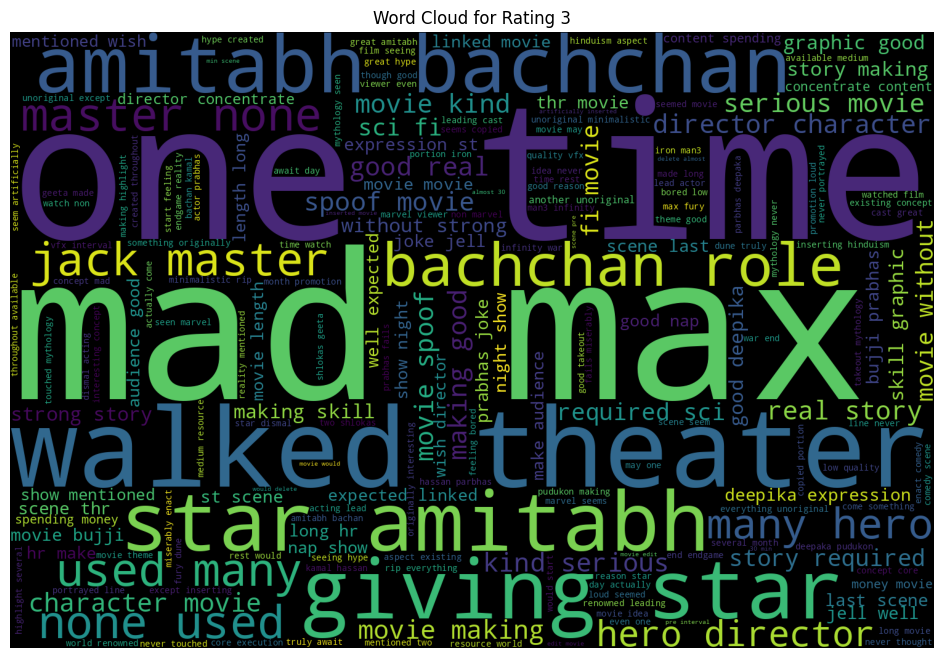

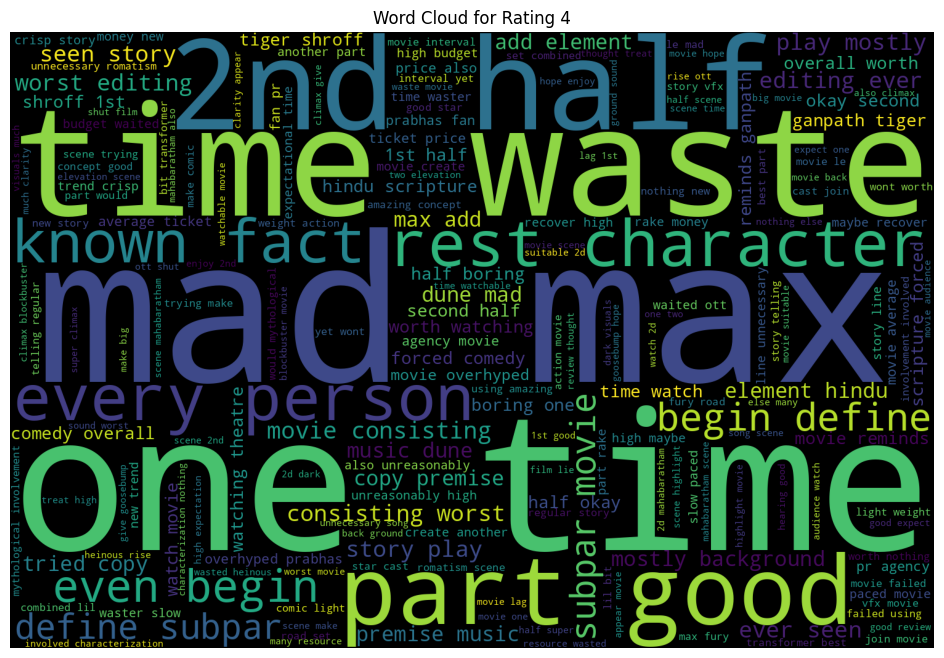

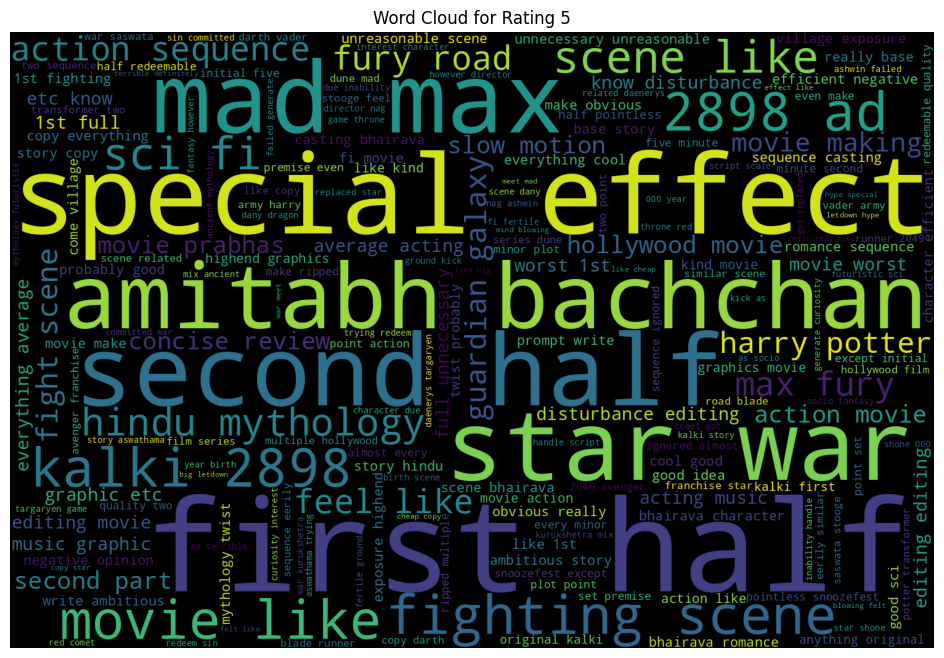

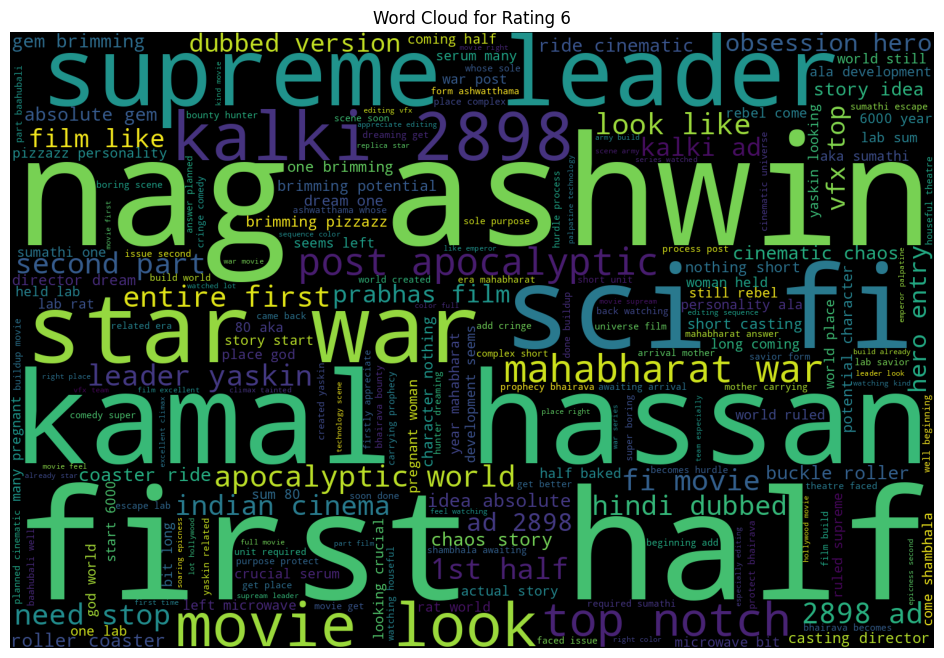

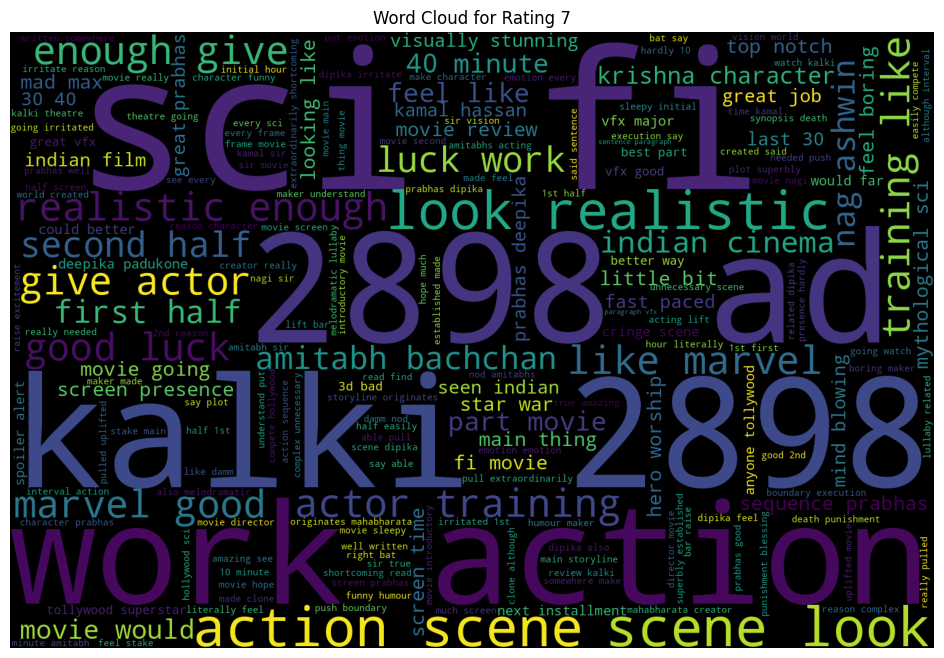

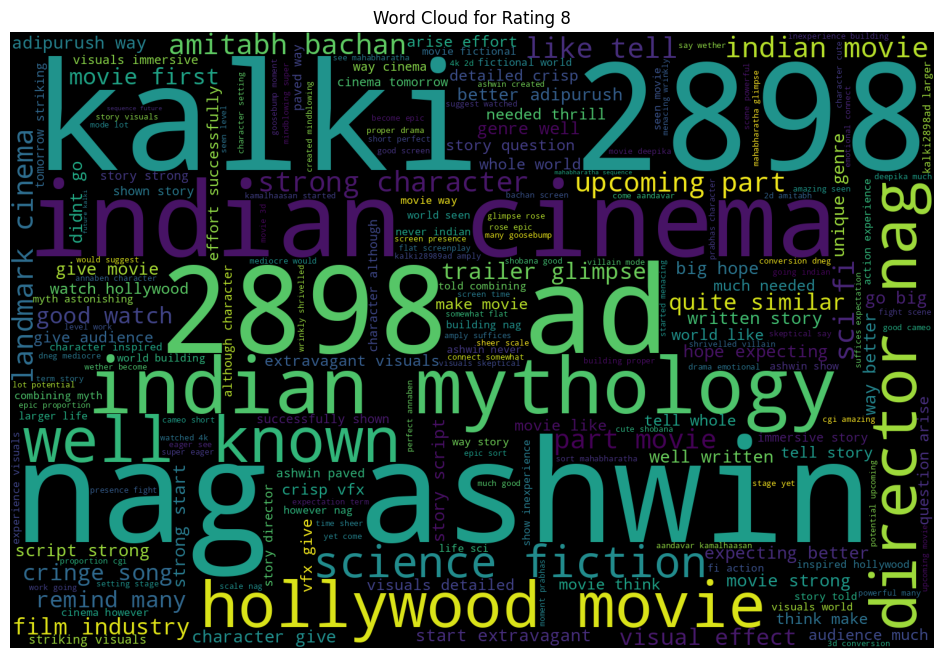

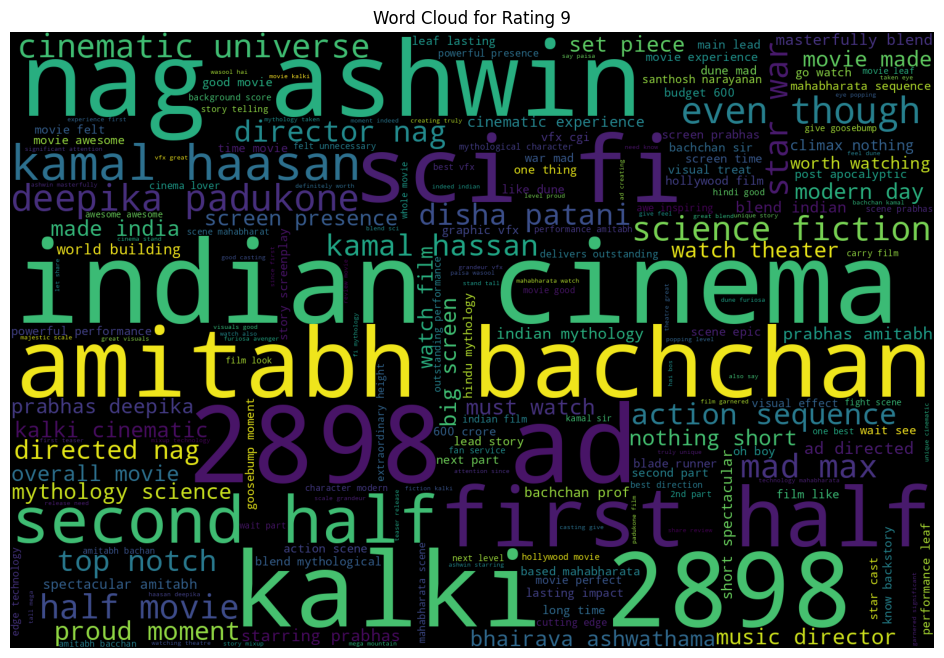

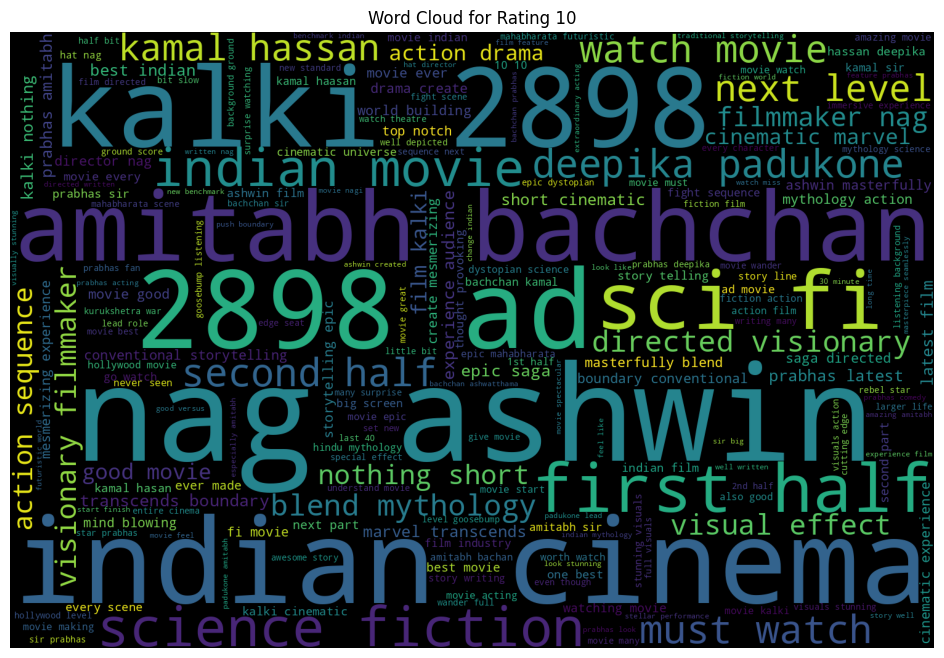

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

for rating in range(1,11):
    curr_lemmatized_tokens = list(df[df['Rating']==rating]['review_lemmas'])
    vectorizer = CountVectorizer(ngram_range=(2,2))
    bag_of_words = vectorizer.fit_transform(df[df['Rating']==rating]['review_lemmas'].apply(lambda x : ' '.join(x)))
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_dict = dict(words_freq)
    WC_height = 1000
    WC_width = 1500
    WC_max_words = 200
    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
    wordCloud.generate_from_frequencies(words_dict)
    plt.figure(figsize=(20,8))
    plt.imshow(wordCloud)
    plt.title('Word Cloud for Rating '+str(rating))
    plt.axis("off")
    plt.show()

### BERTopic:

Trying to identify topics using BERTopic.

In [ ]:
# Install necessary libraries if you haven't already
!pip install bertopic[visualizations]
!pip install sentence_transformers

import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 M

In [ ]:
# Fit BERTopic on your movie reviews using BERT embeddings
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df['cleaned_review'])

topic_model.get_topic_info()
topic_model.visualize_topics()

I did not like how I can see stopwords in my topic visulaization. It does not seem useful to me. So, in the below code, I'm removing stopwords and creating a model using the cleaned_reviews_without_stopwords.

In [ ]:
# Function to remove stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply stop words removal
df['cleaned_review_without_stopwords'] = df['cleaned_review'].apply(remove_stopwords)

# Fit BERTopic on your cleaned movie reviews using BERT embeddings
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(df['cleaned_review_without_stopwords'])

# Retrieve the most frequent topics
top_topics = topic_model.get_topics()

# Print top words from each topic
for topic_id, top_words in top_topics.items():
    top_words_str = ', '.join(word for word, _ in top_words)  # Extract words from tuples
    print(f"Topic {topic_id}: {top_words_str}")

Topic -1: movie, film, good, like, vfx, indian, scenes, story, part, prabhas
Topic 0: movie, kalki, indian, film, prabhas, amitabh, cinema, 2898, ad, mahabharata
Topic 1: movie, story, good, half, money, boring, time, scenes, better, watching
Topic 2: vfx, strong, script, characters, written, unique, extravagant, start, thrill, crisp
Topic 3: audiences, mesmerizing, latest, conventional, transcends, filmmaker, saga, kalki, directed, masterfully


In [ ]:
topic_model.visualize_topics()


## Initial Results:

*Conduct initial tests of your models or analysis techniques.
Provide a summary of the results, including any initial performance metrics or insights gained.*


  * All reviews have a rating.
  * The average rating is 7.4, and the median rating is 9, indicating left-skewed data.
  * A significant number of reviews have a rating of 10, with more reviews observed for ratings above 8.
  * Reviews are most frequently posted on Thursdays and least frequently on Tuesdays, contrary to an expected increase throughout the week. Weekends still show higher review counts compared to weekdays.
  * One-word reviews, such as ".....Positives...." and "Review:", were found to be incomplete or minimal in content.
  * Removed obvious tokens that added no value to the analysis was crucial for extracting meaningful insights.
  * Reviews often mention actors like Prabhas, Amitabh, and Kamal, focusing on their performances, the story, scenes, and characters, suggesting a connection to Indian mythology and VFX.
  * Bigrams like "Star Wars" and "Mad Max" hint at high production value, possibly replicating Hollywood standards.
  * Trigrams reveal that Nag Ashwin is the director, with positive mentions of his work and the genre, emphasizing conventional storytelling and a mesmerizing experience.
  * Word clouds provide an engaging way to visualize main topics across different ratings.
  * Using BERTopic, the presence of stopwords in topic visualization was unhelpful, so they were removed for a more meaningful model with cleaned reviews.

*Discuss any challenges encountered and how you addressed them.*

  * Webscrapping on google colab gave me multiple errors so I had to do that locally(used a virtual env) and save the file, upload it to google colab to start my analysis.
  * Stopword Interference in BERTopic: Improved topic relevance by filtering out stopwords.

## Next Steps:

*Outline the steps you plan to take to refine your approach and improve your results.
Highlight any additional data you might need, further analyses, or alternative methodologies you are considering.*

1. I want to create 3 wordclouds for ratings 1-4, 5-7, 8-10 by merging highest used words from above mentioned categories to visualize words that appear often when someone thinks the movie is horrible vs when someone thinks the movie is great.
2. I gained more insights when performing EDA than when I used BERTopic. (Note to self: Fine-tune BERTopic model) Fine-Tune my model such that it can clearly identify key topics, actors, and themes in reviews.
3. The dataset i used has about 450 reviews. I would like use a dataset with higher number of reviews over a period of time so i can observe how reviewing has changed over time or how people are perceiving the same movie over a period of time.
4. With higher review count, I can also perform sentiment analysis by diving my reviews into positives and negatives. I would like to use tf-idf and RandomforestClasssfier vectorize, train and test my data. By doing so i can have a better understanding of how well my model is doing when i look at the classfication report.